In [9]:
import numpy as np
import matplotlib.pyplot as plt
import json

# Subproject5 Visualization
### Load Model Training Output Data
From the previous section, we stored the model training outputs. We will use this cached data for visualization purposes. This is so we do not have to train our model every time before we want to analyze the results.

In [10]:
def open_training_output_file(path):
    with open(path, "r") as file:
        json_str = file.read()
    return json.loads(json_str)

sgd_output_base_path = "./output"

# change the filenames below accordingly. 
### note that when running both GF and CF visualization, hyperparameter configs MUST match
sgd_output_filename = f"{sgd_output_base_path}/2022-02-22_11-49-11.907892_GD_degree-3_iterations-10000_eta-0.1-0.01-0.001_lam-0.01-0.001-0_mbs-50-100-200.json"
sgd_training_output = open_training_output_file(sgd_output_filename)

sgd_results = sgd_training_output["results"]

training_metadata = sgd_training_output["metadata"]

# get metadata - metadata will be the same for GF and CF (sorta)
max_degree = training_metadata["max_degree"]
training_iterations = training_metadata["iterations"]
eta_list = training_metadata["eta_list"]
lam_list = training_metadata["lam_list"]
iteration_step = training_metadata["iteration_step"]
mini_batch_size_list = training_metadata["mini_batch_size_list"]

### Optimal Training Hyperparameters
We can find the optimal training parameters by finding the training run that yielded the smallest validation error.

In [26]:
sgd_fields_to_display = ["degree", "iterations", "eta", "lam", "train_time", "min_train_mse", "min_train_mse_iteration", "min_test_mse", "min_test_mse_iteration", "mini_batch_size"]

def format_training_result_string(item, fields): 
    """
        Helper to generate for a training result only containing 
        a defined subset of dictionary properties
        
        parameters
            item: dictionary object containing results for a single training run
            fields: list of field names to display
        returns
            string
    """
    formatted_string = ""
    
    for field in fields:
        field_data = item[field]
        formatted_string += f"\t{field}: {field_data}\n"
        
    return formatted_string
    
for mbs_val in mini_batch_size_list:
    filtered = list(filter(lambda x: x["mini_batch_size"] == mbs_val, sgd_results))
    best_train_for_mbs = min(filtered, key=lambda x: x["min_test_mse"])
    print(f"Stochastic Gradient Descent - Minimum Validation MSE Training Run - MBS: {mbs_val}:\n{format_training_result_string(best_train_for_mbs, sgd_fields_to_display)}\n")    
    
best_sgd_train = min(sgd_results, key=lambda x: x["min_test_mse"])
print(f"Stochastic Gradient Descent - Minimum Validation MSE Training Run - OVERALL:\n{format_training_result_string(best_sgd_train, sgd_fields_to_display)}\n")

Stochastic Gradient Descent - Minimum Validation MSE Training Run - MBS: 50:
	degree: 2
	iterations: 10000
	eta: 0.1
	lam: 0.01
	train_time: 7.917908430099487
	min_train_mse: 0
	min_train_mse_iteration: 2000
	min_test_mse: 2
	min_test_mse_iteration: 1000
	mini_batch_size: 50


Stochastic Gradient Descent - Minimum Validation MSE Training Run - MBS: 100:
	degree: 2
	iterations: 10000
	eta: 0.1
	lam: 0.01
	train_time: 12.55649209022522
	min_train_mse: 0
	min_train_mse_iteration: 2500
	min_test_mse: 2
	min_test_mse_iteration: 1000
	mini_batch_size: 100


Stochastic Gradient Descent - Minimum Validation MSE Training Run - MBS: 200:
	degree: 2
	iterations: 10000
	eta: 0.1
	lam: 0.01
	train_time: 17.54076075553894
	min_train_mse: 2
	min_train_mse_iteration: 3000
	min_test_mse: 2
	min_test_mse_iteration: 1000
	mini_batch_size: 200


Stochastic Gradient Descent - Minimum Validation MSE Training Run - OVERALL:
	degree: 2
	iterations: 10000
	eta: 0.1
	lam: 0.01
	train_time: 7.917908430099487
	mi

### Plotting Output Config

In [12]:
# plotting config
sgd_plot_output_path = "./output/plots"

# Stochastic Gradient Descent Method
### Set up the Plotting X-Axis

In [13]:
# calculate our gd x-axis
x_axis = []
for i in range(1, (training_iterations // iteration_step) + 1):
    x_axis.append(i * iteration_step)

print(iteration_step) # debug
print(x_axis) # debug

def get_iteration_index(iteration):
    """
        return the scaled index in our x-axis list for a given iteration
        e.g. (99,000) -> return 99 (iteration_step = 1000) 
    """
    return iteration // iteration_step

500
[500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000]


### Plotting Regularization vs. Misclassifications

Pseudo-Code for the algorithm below:
- for each degree
    - create fig, 
        
    - for the fig, create subplots; number of subplots = `len(lams) * len(etas) * 2`
    
    - for each $\eta$ value create a subplot
        - on each subplot for $\eta$, plot all vals of $\lambda$ with legend

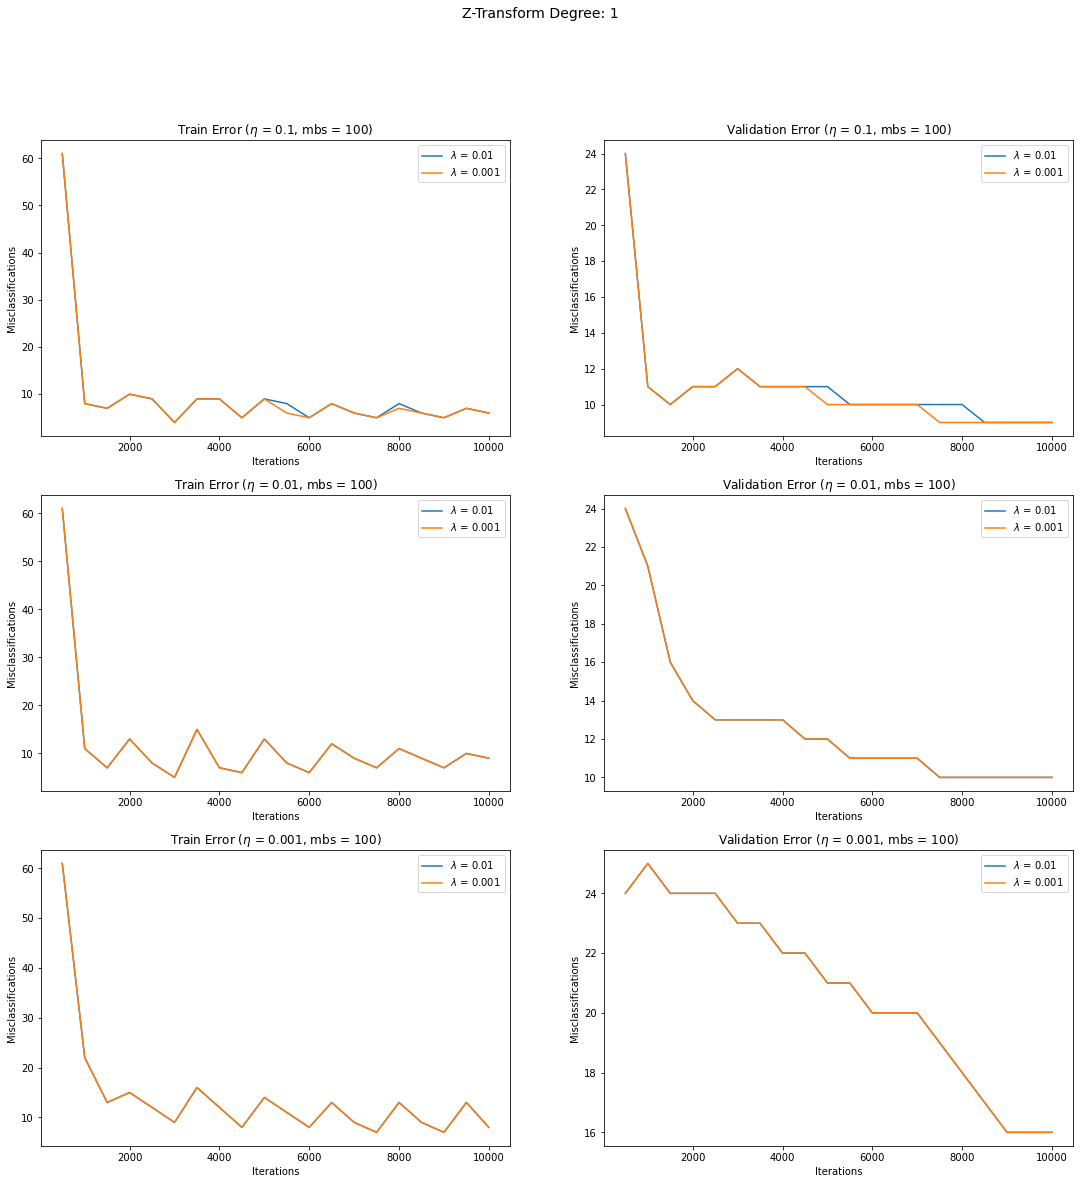

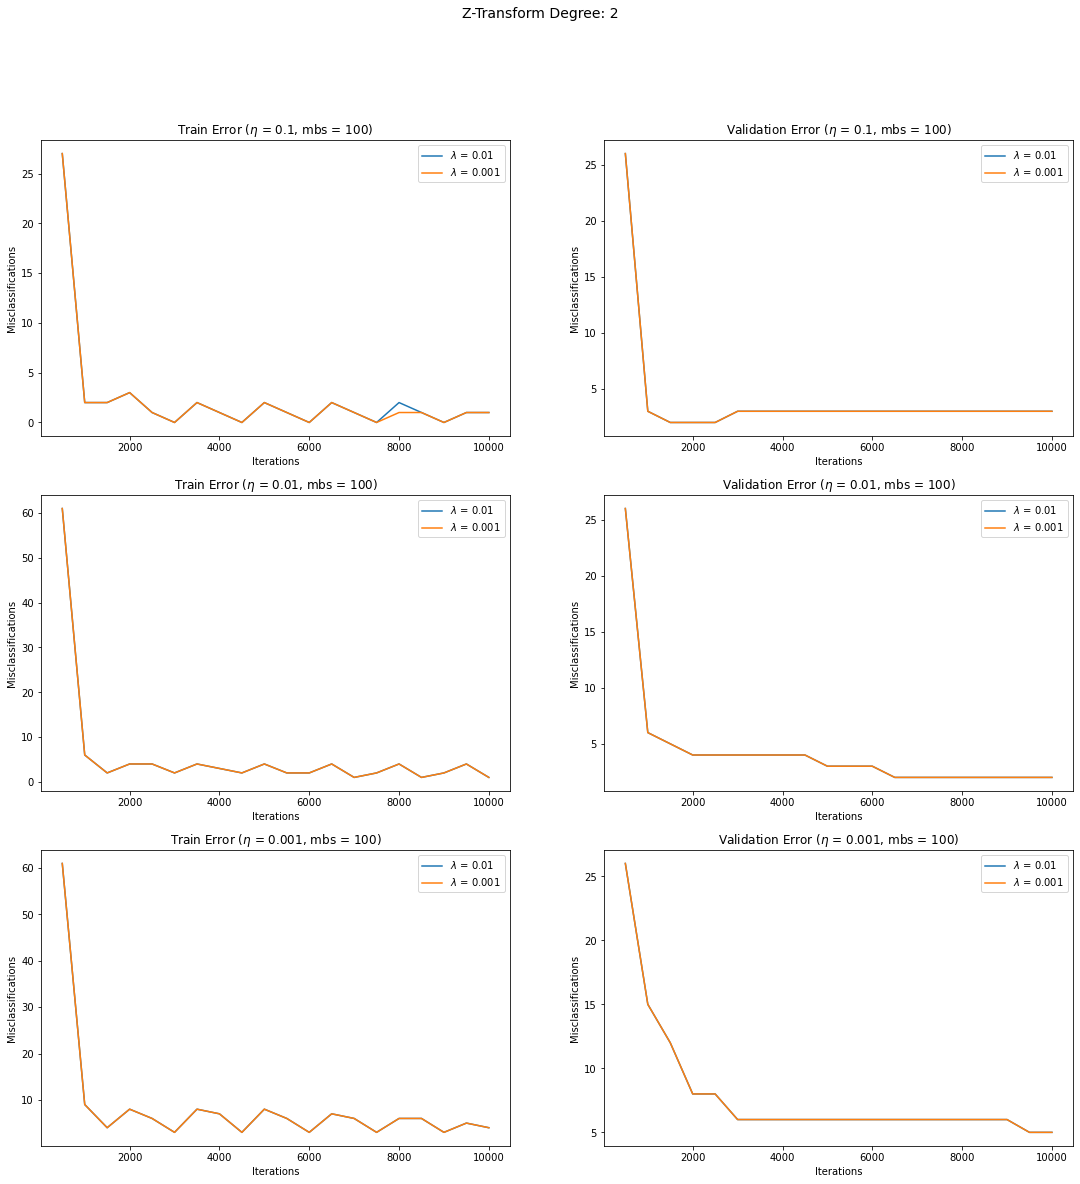

In [15]:
iteration_start_index = None
iteration_end_index = None
subplot_rows = len(eta_list)
subplot_cols = 2

fixed_mini_batch_size = mini_batch_size_list[1]
        
# for each degree we create a figure
for r in np.arange(1, max_degree + 1):
    degree_fig = plt.figure()
    
    # figure config    
    degree_fig.set_size_inches(18.5, 18.5)
    degree_fig.suptitle(f'Z-Transform Degree: {r}', fontsize=14)
    
    # subplot for each eta value
    for i, eta_val in enumerate(eta_list):
        
        train_mse_ax = degree_fig.add_subplot(subplot_rows, subplot_cols, 2 * i + 1)
        test_mse_ax = degree_fig.add_subplot(subplot_rows, subplot_cols, 2 * i + 2)
        
        train_mse_ax.set_title(f"Train Error ($\eta$ = {eta_val}, mbs = {fixed_mini_batch_size})")
        train_mse_ax.set_ylabel("Misclassifications")
        train_mse_ax.set_xlabel("Iterations")
        
        test_mse_ax.set_title(f"Validation Error ($\eta$ = {eta_val}, mbs = {fixed_mini_batch_size})")
        test_mse_ax.set_ylabel("Misclassifications")
        test_mse_ax.set_xlabel("Iterations")

        # plot a line on the subplot for each lambda
        for lam_val in lam_list:
        
            y_val = list(filter(lambda x: 
                                x["degree"] == r and 
                                x["iterations"] == training_iterations and 
                                x["eta"] == eta_val and 
                                x["lam"] == lam_val and
                                x["mini_batch_size"] == fixed_mini_batch_size, 
                                sgd_results))
            
            y_train_mse = y_val[0]["train_mse"]
            y_test_mse = y_val[0]["test_mse"]
            
            train_mse_ax.plot(x_axis[iteration_start_index:iteration_end_index], 
                              y_train_mse[iteration_start_index:iteration_end_index], 
                              label=f"$\lambda$ = {lam_val}")

            test_mse_ax.plot(x_axis[iteration_start_index:iteration_end_index], 
                             y_test_mse[iteration_start_index:iteration_end_index], 
                             label=f"$\lambda$ = {lam_val}")

        train_mse_ax.legend()
        test_mse_ax.legend()
        
    # save output
    degree_fig.savefig(f"{sgd_plot_output_path}/sgd_fig_degree-{r}-LAM_legend.jpeg") # TODO: make better name

plt.show()

## Plotting Learning Rate vs. Misclassification
We use the same algorithm as the previous cell but now create subplots for each $\lambda$ plotting all $\eta$ values.

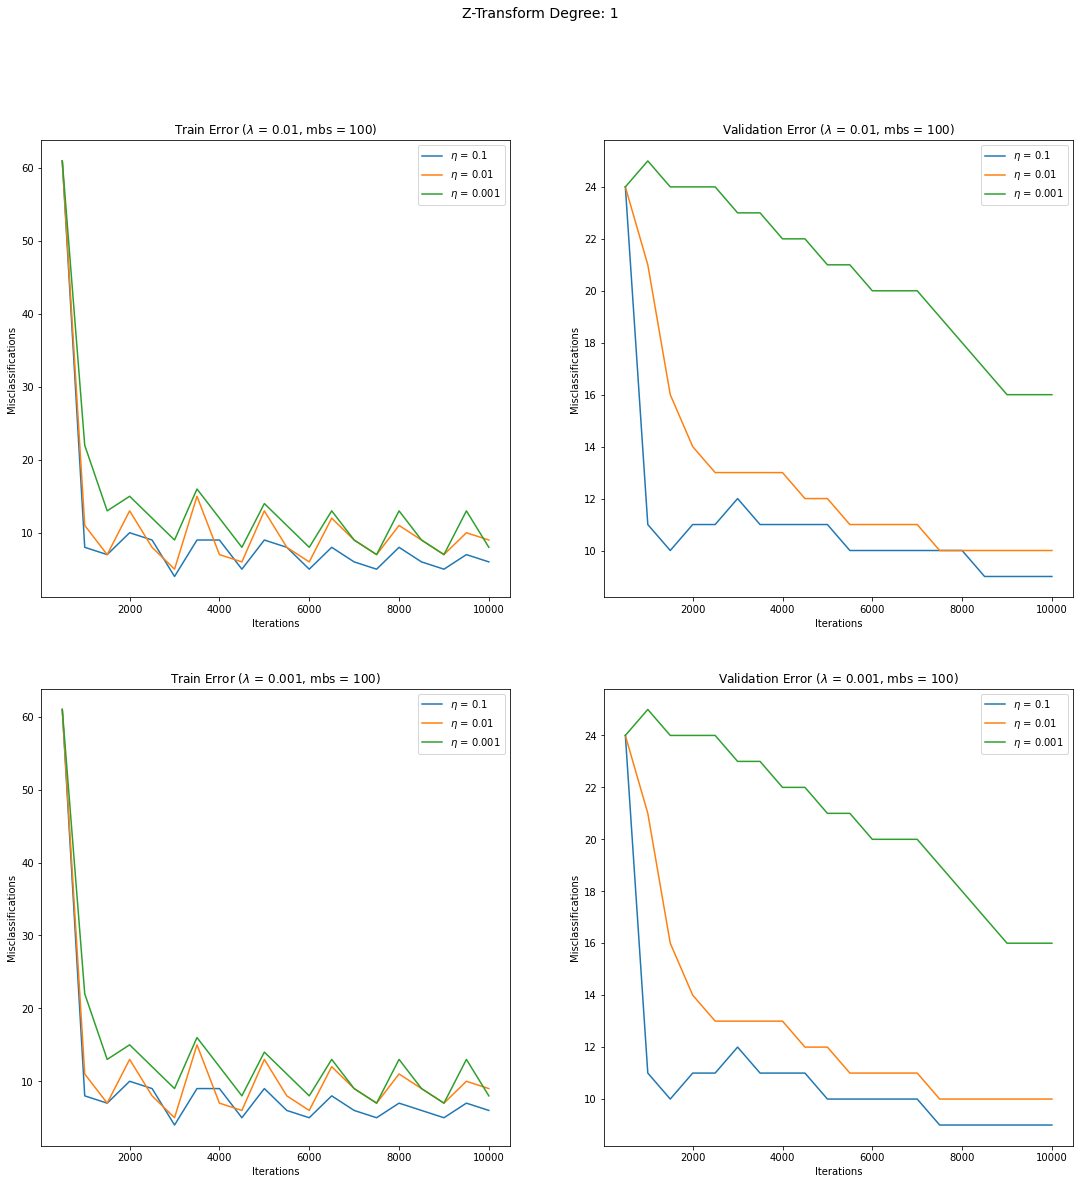

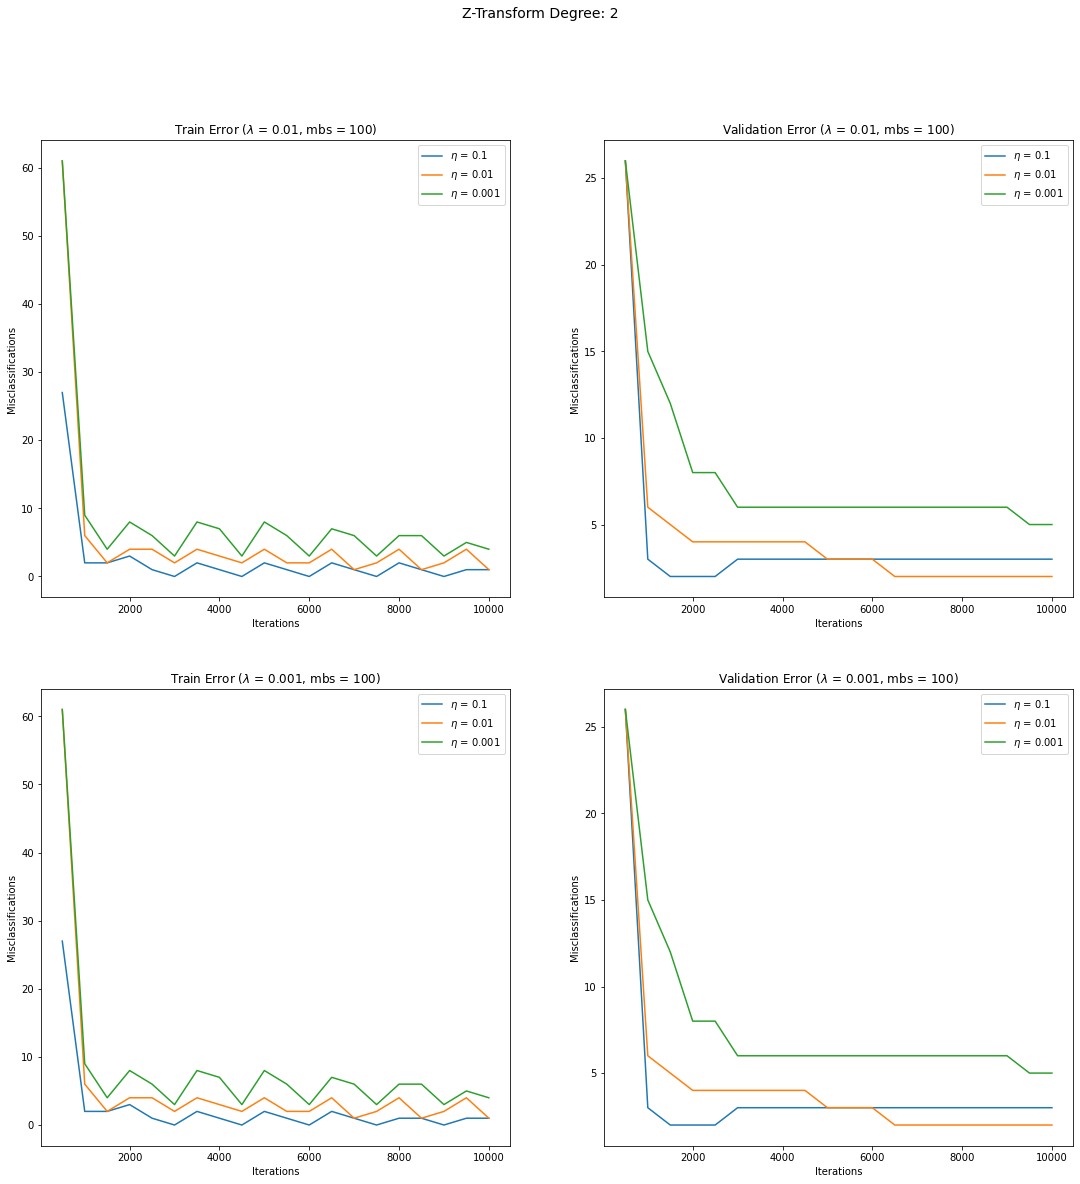

In [18]:
# plotting config
iteration_start_index = None
iteration_end_index = None
subplot_rows = len(lam_list)
subplot_cols = 2

# our x-axis
# x_iterations = np.arange(training_iterations)

# for each degree we create a figure
for r in np.arange(1, max_degree + 1):
    degree_fig = plt.figure()
    
    # figure config    
    degree_fig.set_size_inches(18.5, 18.5)
    degree_fig.suptitle(f'Z-Transform Degree: {r}', fontsize=14)
    
    # subplot for each eta value
    for i, lam_val in enumerate(lam_list):
        
        train_mse_ax = degree_fig.add_subplot(subplot_rows, subplot_cols, 2 * i + 1)
        test_mse_ax = degree_fig.add_subplot(subplot_rows, subplot_cols, 2 * i + 2)
        
        train_mse_ax.set_title(f"Train Error ($\lambda$ = {lam_val}, mbs = {fixed_mini_batch_size})")
        train_mse_ax.set_ylabel("Misclassifications")
        train_mse_ax.set_xlabel("Iterations")
        
        test_mse_ax.set_title(f"Validation Error ($\lambda$ = {lam_val}, mbs = {fixed_mini_batch_size})")
        test_mse_ax.set_ylabel("Misclassifications")
        test_mse_ax.set_xlabel("Iterations")

        # plot a line on the subplot for each lambda
        for eta_val in eta_list:
        
            y_val = list(filter(lambda x: 
                                x["degree"] == r and 
                                x["iterations"] == training_iterations and 
                                x["eta"] == eta_val and 
                                x["lam"] == lam_val and
                                x["mini_batch_size"] == fixed_mini_batch_size, 
                                sgd_results))
            
            y_train_mse = y_val[0]["train_mse"]
            y_test_mse = y_val[0]["test_mse"]

            train_mse_ax.plot(x_axis[iteration_start_index:iteration_end_index], 
                              y_train_mse[iteration_start_index:iteration_end_index], 
                              label=f"$\eta$ = {eta_val}")

            test_mse_ax.plot(x_axis[iteration_start_index:iteration_end_index], 
                             y_test_mse[iteration_start_index:iteration_end_index], 
                             label=f"$\eta$ = {eta_val}")

        train_mse_ax.legend()
        test_mse_ax.legend()
        
    # save output
    degree_fig.savefig(f"{sgd_plot_output_path}/sgd_fig_degree-{r}-ETA_legend.jpeg") # TODO: make better name

plt.show()

## Plotting Mini Batch Size vs. Misclassifications

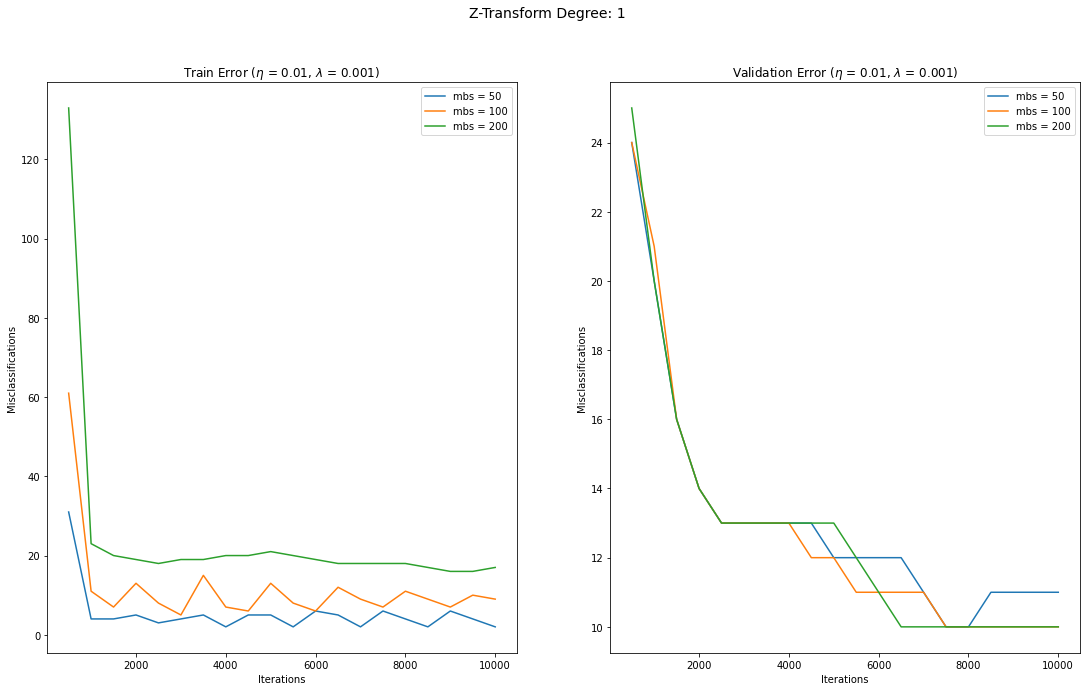

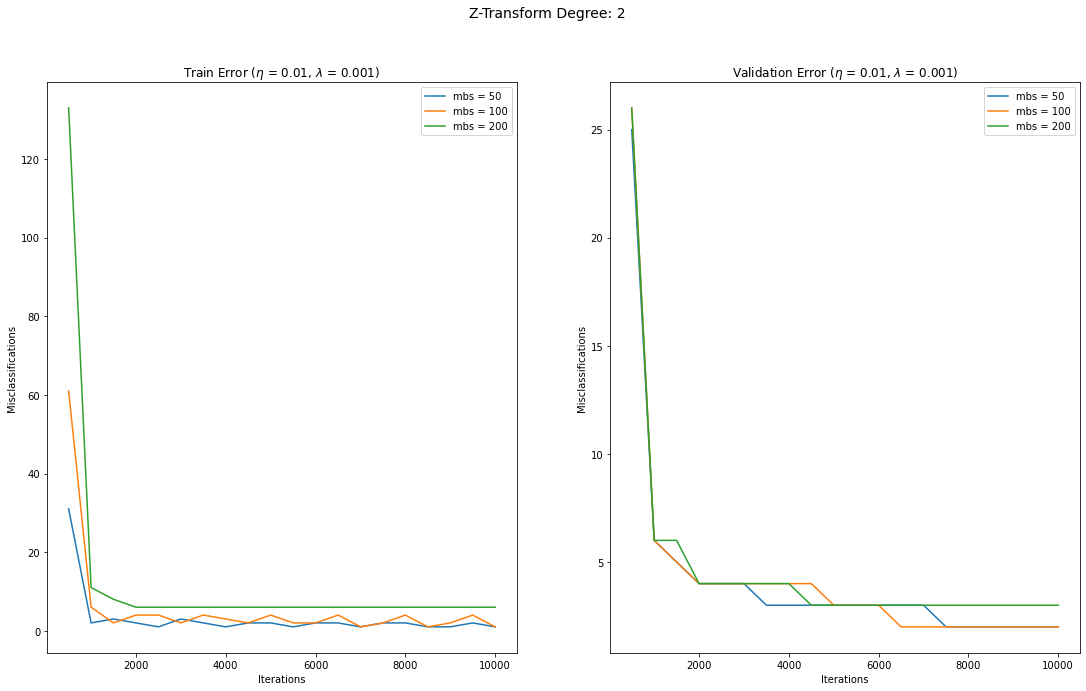

In [27]:
iteration_start_index = None
iteration_end_index = None
subplot_rows = 1
subplot_cols = 2

fixed_eta = eta_list[1] # 
fixed_lam = lam_list[1] #

# for each degree we create a figure
for r in np.arange(1, max_degree + 1):
    degree_fig = plt.figure()
    
    # figure config    
    degree_fig.set_size_inches(18.5, 10.5)
    degree_fig.suptitle(f'Z-Transform Degree: {r}', fontsize=14)
    
    train_mse_ax = degree_fig.add_subplot(subplot_rows, subplot_cols, 1)
    test_mse_ax = degree_fig.add_subplot(subplot_rows, subplot_cols, 2)

    train_mse_ax.set_title(f"Train Error ($\eta$ = {fixed_eta}, $\lambda$ = {fixed_lam})")
    train_mse_ax.set_ylabel("Misclassifications")
    train_mse_ax.set_xlabel("Iterations")

    test_mse_ax.set_title(f"Validation Error ($\eta$ = {fixed_eta}, $\lambda$ = {fixed_lam})")
    test_mse_ax.set_ylabel("Misclassifications")
    test_mse_ax.set_xlabel("Iterations")

    # plot a line on the subplot for each lambda
    for mini_batch_size_val in mini_batch_size_list:
        y_val = list(filter(lambda x: 
                            x["degree"] == r and 
                            x["iterations"] == training_iterations and 
                            x["eta"] == fixed_eta and 
                            x["lam"] == fixed_lam and
                            x["mini_batch_size"] == mini_batch_size_val,
                            sgd_results))
        
        y_train_mse = y_val[0]["train_mse"]
        y_test_mse = y_val[0]["test_mse"]

        train_mse_ax.plot(x_axis[iteration_start_index:iteration_end_index], 
                          y_train_mse[iteration_start_index:iteration_end_index], 
                          label=f"mbs = {mini_batch_size_val}")

        test_mse_ax.plot(x_axis[iteration_start_index:iteration_end_index], 
                         y_test_mse[iteration_start_index:iteration_end_index], 
                         label=f"mbs = {mini_batch_size_val}")

        train_mse_ax.legend()
        test_mse_ax.legend()
        
    # save output
    degree_fig.savefig(f"{sgd_plot_output_path}/sgd_fig_degree-{r}-MBS_legend.jpeg") # TODO: make better name

plt.show()